# Pruebas Adaboost + DecisionTree

El set de training usado se genera desde `lucho/generar_set_test`

Cambios respecto a submit-49:
- Set de entrenamiento con un dos features nuevos (requiere_terciario/terciario_completo) y un feature separado en dos: score_desc_vistas/score_desc_postulaciones

In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [3]:
RANDOM_SEED = 12

In [9]:
entrenamiento = pd.read_csv('/home/luciano/orga-datos/training-sets/training-set-final-2.csv')

In [18]:
print('len(entrenamiento):', len(entrenamiento))
print('len(entrenamiento[entrenamiento[\'sepostulo\'] == 0]):', len(entrenamiento[entrenamiento['sepostulo'] == 0]))
print('len(entrenamiento[entrenamiento[\'sepostulo\'] == 1]):', len(entrenamiento[entrenamiento['sepostulo'] == 1]))

In [23]:
entrenamiento['terciario_completo'].isna().value_counts()

False    905979
True      94021
Name: terciario_completo, dtype: int64

In [11]:
kaggle_set = pd.read_csv('/home/luciano/orga-datos/test_final_100k-preprocesado.csv')

In [12]:
TEST_SIZE_PERCENT = 0.1

In [13]:
X = entrenamiento.drop(axis=1, labels=['idaviso', 'idpostulante', 'sepostulo'])
y = entrenamiento['sepostulo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

In [14]:
X_kaggle = kaggle_set.drop(axis=1, labels=['id', 'idaviso', 'idpostulante'])

In [15]:
clasificador = AdaBoostClassifier(
    base_estimator = DecisionTreeClassifier(
        min_samples_split=1000,
        criterion = 'entropy',
        random_state=RANDOM_SEED
    ),
    n_estimators=50,
    random_state=RANDOM_SEED
)

In [16]:
clasificador.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [12]:
y_test_predictd = clasificador.predict_proba(X_test)[:, 1]

In [13]:
roc_auc_score(y_test, y_test_predictd)

0.9896345174029482

In [14]:
clasificador.score(X_test, y_test)

0.96197

In [15]:
y_kaggle = clasificador.predict_proba(X_kaggle)[:, 1]

In [16]:
kaggle_out = kaggle_set[['id']].copy()
kaggle_out['sepostulo'] = y_kaggle

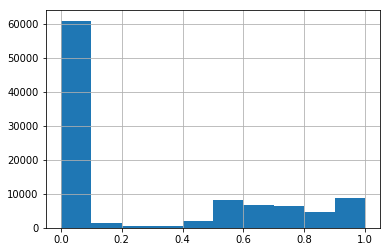

In [17]:
kaggle_out['sepostulo'].hist()

In [18]:
kaggle_out.to_csv('/home/luciano/orga-datos/tmp/submits/submit-45.csv', index=False)

In [19]:
kaggle_38 = pd.read_csv('/home/luciano/orga-datos/tmp/submits/submit-38.csv')

In [20]:
print('ROCAUC 38 vs 41:', roc_auc_score(np.round(kaggle_38['sepostulo']), kaggle_out['sepostulo']))

ROCAUC 38 vs 41: 0.9957781182204818


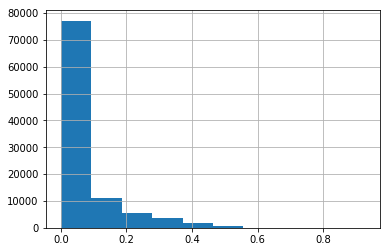

In [21]:
np.abs(kaggle_38['sepostulo'] - kaggle_out['sepostulo']).hist()

In [ ]:
# kaggle score: 0.85